In [8]:
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal



In [2]:
data = np.loadtxt('Data_LED_2.6V_1350CS_56V.txt').T
samples =500
time_0 =0
time=np.linspace(0,samples*8,samples)
pulses = -1000*data[time_0:time_0+samples,:10000]
#pulses = -data
# Constants
t = 1e-9
gain = 92   ####### revisar estooooo####
res = 51
kte = t/(gain*res)
print(len(data))

500


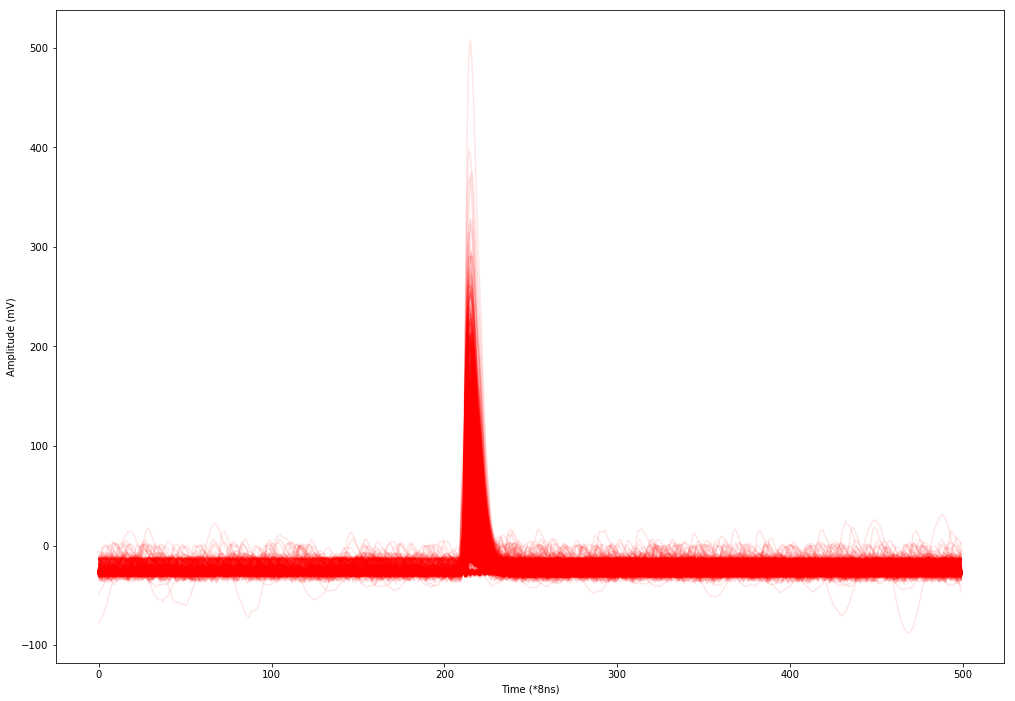

In [3]:
plt.figure()
plt.plot(pulses,'r',alpha=0.1)
plt.xlabel('Time (*8ns)')
plt.ylabel('Amplitude (mV)')
plt.gcf().set_size_inches(17,12)
plt.show()

In [4]:
# Baseline correction
N = len(pulses.T)	# Number of pulses
mean = np.mean(pulses[1,:])
pulses = pulses - mean
# Outliers filtering
mi = np.zeros(N)
pul = 0
outliers = []
for i in range (N):
	sum = 0
	mi[i] = np.amin(pulses[:,i])
	if mi[i] > -11:
		pul = pul + 1
	else:
		outliers.append(i)       

print 'Number of pulses: ' + str(pul)
print 'Outliers: ' +str(len(outliers))

Number of pulses: 9972
Outliers: 28


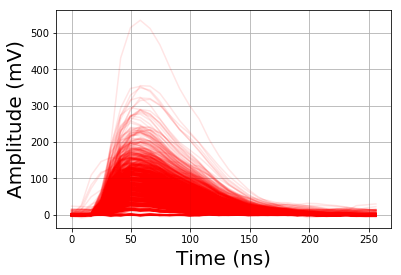

In [5]:
# señal filtrada 
pulses=np.delete(pulses,(outliers),axis=1)
time=np.linspace(0,32*8,32)
plt.figure()
plt.plot(time,pulses[208:240,:2000],'r',alpha=0.1)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=20)
plt.grid(True)
#plt.ylim(-10,100)
#plt.gcf().set_size_inches(11,7)
plt.savefig('2kPulses_Hamamatus.png')
plt.show()


In [6]:
# Pulse and charge computing
N = len(pulses.T)	# Number of pulses
charge = np.zeros((N,1))
peak = np.zeros((N,1))
wind=25
start=209
pulsesf=pulses[start:start+wind,:]
for i in range (N):
	charge[i] = np.sum(pulsesf[:,i]) #*kte
	peak[i] = np.max(pulsesf[:,i])

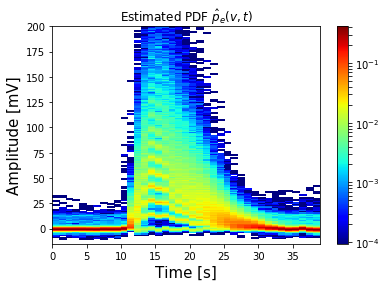

In [14]:

K = 40# number of temporal samples
N = 1000  # number of sample functions
bins = 200  # number of bins for the histogram
pulses2=pulses[200:240,:].T

# compute the histogram
px = np.zeros((bins, K))
for n in range(K):
    px[:, n], edges = np.histogram(pulses2[:, n], bins=bins, range=(-15,200), density=True)

# plot the PDF
#plt.figure(figsize=(10,6))

plt.pcolor(np.arange(K), edges,px,cmap='jet',norm=colors.LogNorm())
plt.title(r'Estimated PDF $\hat{p}_e(v, t)$')
plt.xlabel(r'Time [s]',fontsize=15)
plt.ylabel(r'Amplitude [mV]',fontsize=15)
plt.colorbar()
#plt.clim(0.01,0.1)
plt.autoscale(tight=True)
plt.show()


